# **Simple Linear Regression**



**Problem Statement :**  To Predict the percentage of marks of the students based on no.of study hours.

*   **Predict the score for a student studied for 9.25 hrs/day**


In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
#importing and reaading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Dec 16 _Webinar/st_record.csv")

In [110]:
#the last five values in the dataset
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86




*   Two variables involved --> Simple Linear Regression
*   Hours --> Independent Variable
*   Scores ---> Dependent Variable

# **Y = m X + C**






In [111]:
#number of rows and columns
dataset.shape

(25, 2)

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [114]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [115]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [118]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualization

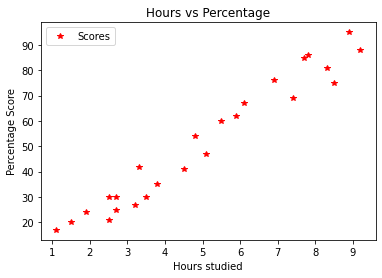

In [119]:
dataset.plot(x='Hours',y='Scores',style='*',color='red')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

**There is a linear relationship between the hours studied and scores**

Text(0.5, 1.0, 'Ploting Regression line')

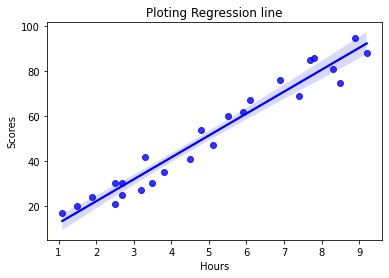

In [120]:
import seaborn as sns
sns.regplot(x='Hours',y='Scores',data=dataset,color='blue')
plt.title("Ploting Regression line")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


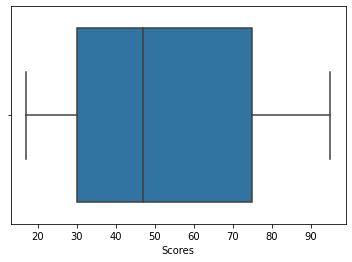

In [122]:
sns.boxplot(dataset["Scores"])

25% of students scored marks less than 30

50% of students scored marks less than 47

75% of students scored marks less than 77


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


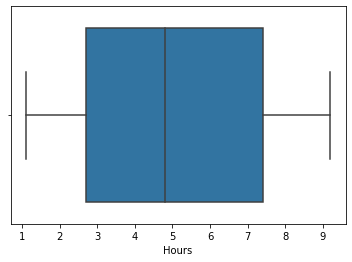

In [129]:
sns.boxplot(dataset["Hours"])

25% of students studied less than 2.7 hours

50% of students studied less than 4.8 hours

75% of students studied less than 7.4 hours

In [ ]:
sns.boxplot(df["Hours"])
plt.show()

**In the above graph, can clearly see that values above 10 are acting as the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


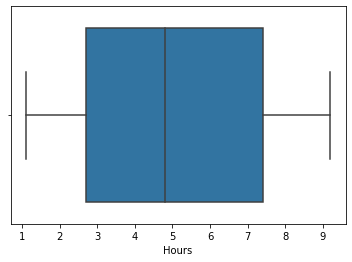

In [95]:
sns.boxplot(dataset["Hours"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


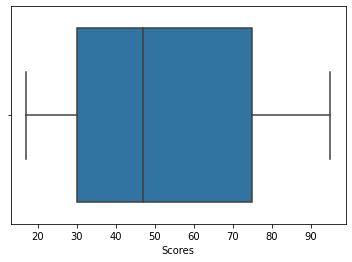

In [96]:
sns.boxplot(dataset["Scores"])

# Adding Noise to dataset

In [150]:
dict = {'Hours':[5,8,100,7],
        'Scores':[500, 88, 90, 60]
               }
  
noisedf = pd.DataFrame(dict)
  
df= dataset.append(noisedf, ignore_index = True)
  
display(df)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


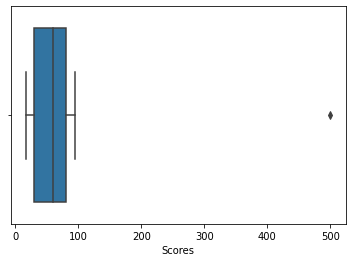

In [151]:
sns.boxplot(df["Scores"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


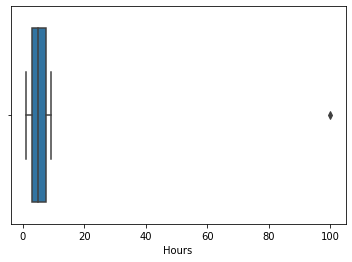

In [153]:
sns.boxplot(df["Hours"])

**In the above graph, can clearly see that values above 100 are acting as the outliers**

**DataFrame1-->dataset--> without Outlier

DataFrame2-->df--> with Outlier**

## Train-Test Split

In [155]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [157]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

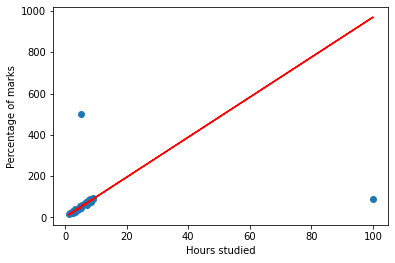

In [165]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()


In [168]:
regressor.coef_

array([9.67953433])

In [169]:
regressor.intercept_

1.843333226724667

In [170]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 32.81784309  27.97807593  68.63212013  33.78579653  58.95258579
  50.24100489 969.79676656  79.27960789  16.36263473]


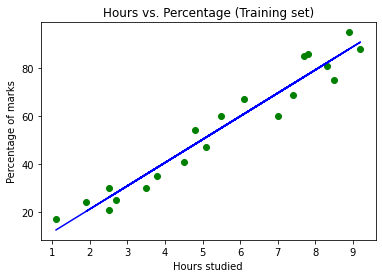

In [172]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

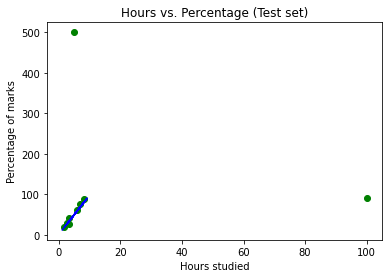

In [173]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [174]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,27,32.817843
1,30,27.978076
2,76,68.632120
3,42,33.785797
4,62,58.952586
5,500,50.241005
6,90,969.796767
7,88,79.279608
8,20,16.362635


## Error Metrics

In [175]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [180]:
print('Mean Absolute Error is:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square error is:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared error is:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is: 152.04253152951463
Mean Square error is: 108509.30675474789
Root Mean Squared error is: 12.330552766584093


In [179]:
print("Slope of regression line",regressor.coef_)
print("y-intercept of Regression line",regressor.intercept_)

Slope of regression line [9.67953433]
y-intercept of Regression line 1.843333226724667


# INTERPRETATION: 
The best fitted simple linear equation is:y=2.018160041434662+9.91065648(x) where x is the number of hours studied and 
y is the percentage score. 
2.018160041434662 is the intercept and 9.91065648 is the slope.